## Выявление параметров успешности игр

### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель:** Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Нам нужно спланировать кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (*Entertainment Software Rating Board*) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. *Entertainment Software Rating Board*). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Примечание:** Данные за 2016 год могут быть неполными.

#### Расшифровка рейтингов ESRB:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» ( до 1994 года "K-A" ("Kids to Adults"))
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

## Оглавление

- [1 Изучение данных из файла](#1)
  - [1.1 Вывод](#1.1)
- [2 Предобработка данных](#2)
  - [2.1 Подготовка данных](#2.1)
  - [2.2 Вывод](#2.2)
- [3 Исследовательский анализ данных](#3)
  - [3.1 Вывод](#3.1)
- [4 Портрет пользователя каждого региона](#4)
  - [4.1 Вывод](#4.1)
- [5 Проверка гипотезы](#5)
  - [5.1 Вывод](#5.1)
- [6 Общий вывод](#6)
- [7 Чек-лист готовности](#7)

## Шаг 1 Изучение данных из файла 
<a id='1'></a>

In [2]:
#импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#прочитаем файлы и сохраним их в отдельный датафрейм
df = pd.read_csv('~/datasets/games.csv')

In [4]:
#выведем первые 5 строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#посмотрим общую информацию 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#посмотрим числовые значения методом describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Вывод
<a id='1.1'></a>

- В файле 16715 строк с типом данных: *float* и *object*

Для дальнейшего анализа, необходимо подготовить данные: 
- Названия столбцов стоит привести к нижнему регистру
- Проверить и удалить явные дубликаты, если они есть
- Есть незначительные пропуски в столбцах с названием игр, жанром и годом выпуска. При условии, что пропуски не пересекаются - в общей сумме получается 273 строки, это 1.63%, можно удалить без ущерба для результатов
- Столбец с оценкой пользователей содержит данные типа *object*, что не соответствует содержимому, необходимо проверить на уникальные значения и преобразовать в float
- Проверить столбец с возрастной категорией на уникальность названий и дублирование (устаревших и актуальных), заменить одни на другие
- В столбце с годом выпуска заменить тип данных на int
- Есть большое количество пропущенных значений в столбцах оценок и рейтинга

Предположений о природе такого количества пропусков как минимум 3: 
 - оценки и рейтинги начали проставлять с определенного периода;
 - игры с пропущенными рейтингами не набрали достаточной популярности, соответственно рейтингов по ним не существует;
 - датасет собран из нескольких источников, в одном из которых данные с рейтингами отсутствовали
 
Можем проверить зависят ли пропуски от года выпуска, если нет, то оставить как есть, так как заполнять медианой или средними не кажется правильным решением. 

## Шаг 2 Предобработка данных
<a id='2'></a>

### Шаг 2.1 Подготовка данных
<a id='2.1'></a>

In [7]:
#заменим названия столбцов (приведем к нижнему регистру)
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
#посчитаем явные дубликаты
df.duplicated().sum()

0

In [9]:
#посчитаем количество пустых строк к столбце с годом выпуска
df['year_of_release'].isna().sum()

269

In [10]:
#найдем 4 цифры в названии игр и заполним ими пустые строки с годом выпуска
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df['name'].str.findall(r'(\d{4})').str[0].dropna().astype(float)
df['year_of_release'].isna().sum()

252

In [11]:
#удалим строки с пропусками в столбцах с названием игры, жанром и годом выпуска
df = df.dropna(subset = ['name', 'genre','year_of_release'])

#проверим
df['name'].isna().sum(), df['genre'].isna().sum(), df['year_of_release'].isna().sum()

(0, 0, 0)

In [12]:
#проверим уникальные значения в столбце user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений есть аббревиатура «tbd» (англ. «to be determined») - подлежит уточнению. Есть смысл заменить его на Nan, чтобы значение приобрело тип float вместо object, ведь по факту, это тот же Nan.

In [13]:
#заменим значение 'tbd' на np.nan
df.loc[df['user_score']=='tbd','user_score'] = np.nan

#проверим
df.query('user_score in ("tbd")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
#проверим уникальные значения в столбце rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- Значение 'K-A' является устаревшей версией, заменим его на актуальное значение 'E'.

In [15]:
#заменим значение 'K-A' на 'E'
df.loc[df['rating']=='K-A','rating'] = 'E'

In [16]:
#для дальнейшего анализа нам будет необходим столбец rating, для того, чтобы мы могли посмотреть распределение строк с
# отсутствующим значением, промаркируем их как 'no_rating'
df['rating'] = df['rating'].fillna('NO_RATING')

#проверим результат
df['rating'].unique()

array(['E', 'NO_RATING', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
#с помощью try/except преобразуем столбец с годом выпуска в целое int, 
#столбец с пользовательской оценкой во float
try:
    df['user_score']= pd.to_numeric(df['user_score'], downcast='float')
    df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast='integer')
    print('Все преобразовано в лучшем виде!')
except:
    print('Ошибка! Что-то пошло не так!')

Все преобразовано в лучшем виде!


In [18]:
#проверим зависят ли пропуски от года выпуска, посмотрим уникальные значения в столбце 'year_of_release'
df.sort_values(by='year_of_release') \
  .loc[df['critic_score'].isna() & df['user_score'].isna(),'year_of_release'] \
  .unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int16)

Зависимости нет, пропуски есть в каждом году. Вероятнее всего датасет собран из нескольких источников, в одном из которых не было информации об оценках и рейтингах. Самым правильным решением видится оставить пропуски как есть.

In [19]:
#проверим на неявные дубликаты столбец с названиями платформ, выведем уникальные значения
df.sort_values(by='platform')['platform'].unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [20]:
#посмотрим сколько всего платформ в нашем датасете
len(df['platform'].unique())

31

In [21]:
#посмотрим за срез за какой срок в нашем распоряжении
len(df['year_of_release'].unique())

37

In [22]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales
df['total_sales'] = df.iloc[:,4:8].sum(axis =1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NO_RATING,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NO_RATING,31.38


In [23]:
#проверим, что все посчитано верно, просуммируем нужные значения в первой строке
round(df.na_sales[0] + df.eu_sales[0] + df.jp_sales[0] + df.other_sales[0], 2)

82.54

### Вывод
<a id='2.2'></a>

- Заменили названия столбцов (привели к нижнему регистру);
- Преобразовали данные в нужные типы. Столбец с годом выпуска в int, столбец с пользовательской оценкой во float, так как это соответствует содержимому;
- Заменили значение 'tbd' на np.nan, заменили значение 'K-A' на 'E', пропущенные значения заменили на NO_RATING, для того, чтобы использовать их при анализе.
- Обработали пропуски: не стали заполнять, так как не нашли зависимости от существующих данных. Для чистоты анализа будем работать с существующими данными.
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Шаг 3 Исследовательский анализ данных
<a id='3'></a>

- Посмотрим, сколько игр выпускалось в разные годы. Рассмотрим данные за все периоды.
- Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Выявим характерный срок появления новых и исчезновения старых платформ.
- Возьмем данные за соответствующий **актуальный период.** Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные должны помочь построить прогноз на 2017 год.
- Выявим какие платформы лидируют по продажам, растут или падают. Выберим несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Выясним, можно ли сказать что-то о самых прибыльных жанрах, выделяются ли жанры с высокими и низкими продажами.

____
- Посмотрим, сколько игр выпускалось в разные годы. Рассмотрим данные за все периоды.

In [24]:
#создадим сводную таблицу с количеством выпущенных игр по годам
year_relised = df.pivot_table(index='year_of_release', values='name', aggfunc='count')  
year_relised.columns = ['count']
year_relised.head()

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


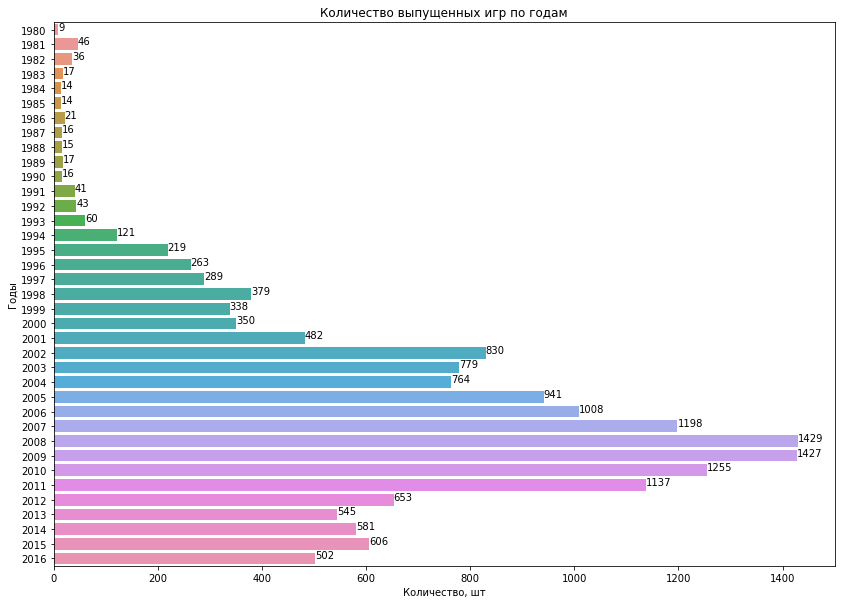

In [25]:
#поcтроим график
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(y = year_relised.index, 
                 x = 'count', 
                 data = year_relised, 
                 orient = "h")
plt.xlabel('Количество, шт')
plt.ylabel('Годы')
plt.gca().set_title('Количество выпущенных игр по годам')

#отобразим значения на горизонтальных барах
for x, y in enumerate (year_relised['count']):
    plt.text(y, x, str(round(y)))

plt.show()

По графику видно, что значимый рост продаж начался с 1994 года, количество выпущенных игр удвоились по сравнению с предыдущим периодом. До этого количество не превышало 60. Больше всего игр выпускалось в 2008 и 2009 годах - 1427 и 1426 соответственно, меньше всего в 1980 - 9. На графике заметно, что в 1981 году был небольшой всплеск, который в последствии спал. Посмотрим, что за платформа начала "эпоху" игр.

In [26]:
#срез для 1981 года
df.query('year_of_release==1981')['platform'].value_counts()

2600    46
Name: platform, dtype: int64

Платформа 2600 Atari выпустила 46 игр, вошедших в наш датасет и стала первой успешной приставкой с играми на картриджах. В 1980-х в США слово «Atari» воспринималось как синоним «Atari 2600». Модель обычно поставлялась с двумя джойстиками либо двумя paddle-контроллерами и одной игрой — сначала это была Combat, а затем Pac-Man. Посмотрим какая игра была лидером продаж в 1981 году.

In [27]:
#сделаем срез по играм 1981 года и отсортируем их по объему продаж
df.query('year_of_release==1981').sort_values(by='total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
240,Pitfall!,2600,1981,Platform,4.21,0.24,0.0,0.05,NaN,NaN,NO_RATING,4.50
736,Frogger,2600,1981,Action,2.06,0.12,0.0,0.02,NaN,NaN,NO_RATING,2.20
773,Demon Attack,2600,1981,Shooter,1.99,0.12,0.0,0.02,NaN,NaN,NO_RATING,2.13
866,E.T.: The Extra Terrestrial,2600,1981,Action,1.84,0.11,0.0,0.02,NaN,NaN,NO_RATING,1.97
1108,Ms. Pac-Man,2600,1981,Puzzle,1.54,0.10,0.0,0.02,NaN,NaN,NO_RATING,1.66


Игра с максимальным объемом продаж -  Pitfall!, а Ms. Pac-Man на 5м месте. Игра Pitfall! представляла собой платформер с боковым скроллингом, но не плавным, как в более современных платформерах, а со сменой экрана, то есть, когда герой доходит до конца экрана, появляется новый экран, всего же таких экранов в игре 255. Все экраны оформлены в одинаковом джунглевом стиле. Управлять приходилось искателем приключений по имени Гарри Питфал (англ. Pitfall Harry). Цель игры — за отведённые 20 минут собрать все 36 разложенные по экранам сокровища (золотые слитки, мешки с деньгами и кольца с драгоценными камнями), чему мешают многочисленные препятствия и враги.

In [28]:
#создадим сводную таблицу с общим объемом продаж по годам
year_sales = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')  
year_sales.columns = ['sum']
year_sales.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sum,37.0,238.67,208.04,11.38,49.37,201.07,361.59,671.52


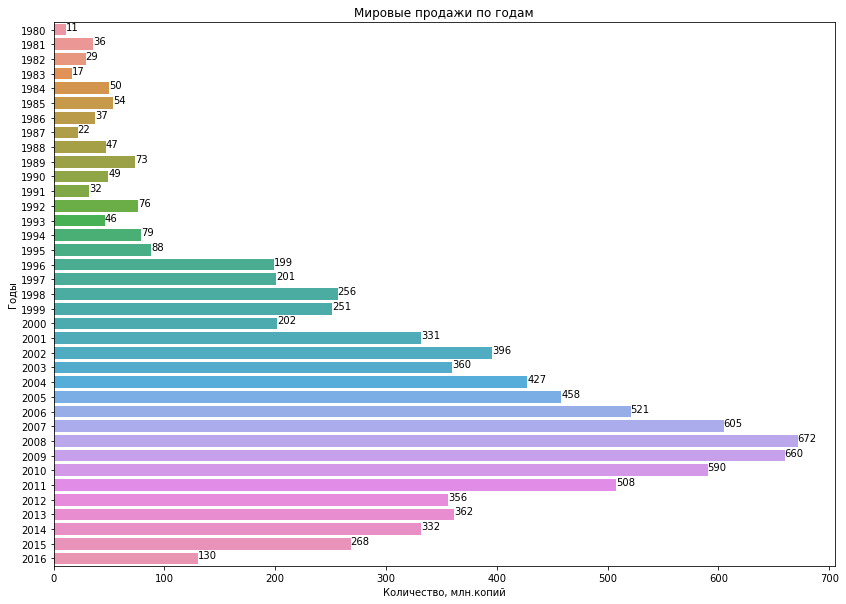

In [29]:
#поcтроим график
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(y=year_sales.index, 
                 x='sum', 
                 data=year_sales, 
                 orient="h") 
plt.xlabel('Количество, млн.копий')
plt.ylabel('Годы')
plt.gca().set_title('Мировые продажи по годам')

for x, y in enumerate (year_sales['sum']):
    plt.text(y, x, str(round(y)))

plt.show()

График общего объема продаж показывает, что резкий скачок произошел в 1996 году, более чем в 2 раза и дальше продажи росли до 2008 года. Дальше начался спад, вплоть до 2016 года. Ввиду того, что данные за 2016 год могут быть неполными, то выводы можем делать об общей динамике до 2015 года. За 7 полных лет (с 2008-го по 2015 год) объемы продаж уменьшились более чем в 2,5 раза.  

По графику видно, что в 2012 году произошла стабилизация рынка после пика продаж. Возьмем для нашего дальнейшего анализа промежуток с 2012 по 2016 год.

Посмотрим, какой средний срок жизни у платформ.

In [30]:
#сгруппируем по платформам и годам, а дальше посчитаем количество уникальных строк в столбце с годом. 
df.groupby(['platform', 'year_of_release'])['total_sales'].sum() \
  .reset_index() \
  .pivot_table(index='platform', values='year_of_release', aggfunc='count') \
  .describe() \
  .T \
  .round(2)

,count,mean,std,min,25%,50%,75%,max
year_of_release,31.0,7.68,5.08,1.0,4.0,7.0,11.0,26.0


Среднее и медианное значение - 7 лет. Столько в среднем живут платформы.

Выберем топ 10 платформ по продажам за 2015, 2016 года. Нам нужно посмотреть их на актуальном промежутке: какие из них уходящие, а какие только набирают популярность.

In [31]:
#создадим лист с названиями платформ, которые были лидерами продаж в 2015 и 2016
list_of_top = df.query('year_of_release>=2015 and year_of_release<=2016') \
                .pivot_table(index='platform', 
                             values='total_sales', 
                             aggfunc='sum') \
                .sort_values(by='total_sales', ascending=False) \
                .head(10) \
                .index \
                .unique() \
                .sort_values()
list_of_top

Index(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

In [32]:
#оставим срез за 2012-2016 года
df_12_16 = df.query('year_of_release>=2012 and year_of_release<=2016 and platform in @list_of_top')

#сгруппируем по годам и платформам
df_12_16_pivot = df_12_16.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum')
df_12_16_pivot.columns = ['total_sales']
df_12_16_pivot.unstack().fillna('')

total_sales                                                   \
platform                3DS     PC     PS3    PS4   PSP    PSV    Wii   WiiU   
year_of_release                                                                
2012                  51.36  23.22  107.36         7.69  16.19  21.71  17.56   
2013                  56.57  12.73  113.25  25.99  3.14  10.59   8.59  21.65   
2014                  43.76  13.28   47.76  100.0  0.24  11.90   3.75  22.03   
2015                  27.78   8.52   16.82  118.9  0.12   6.25   1.14  16.35   
2016                  15.14   5.25    3.60  69.25         4.25   0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2012             99.74         
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

Абсолютные цифры не показательны в данном случае. Есть смысл вычислить долю в общем объеме за каждый год и посмотреть как меняется ситауация.

In [33]:
df_12_16_pivot['ratio'] = df_12_16_pivot['total_sales'].div(df_12_16.groupby('year_of_release')['total_sales'].sum())
df_12_16_pivot['ratio'] = round(df_12_16_pivot['ratio']*100, 2)
df_predict  = df_12_16_pivot.drop(columns = ['total_sales'])
df_predict.unstack().fillna('')

ratio                                                     \
platform           3DS    PC    PS3    PS4   PSP   PSV   Wii  WiiU   X360   
year_of_release                                                             
2012             14.89  6.73  31.13         2.23  4.70  6.30  5.09  28.92   
2013             15.71  3.54  31.45   7.22  0.87  2.94  2.39  6.01  24.60   
2014             13.20  4.01  14.41  30.16  0.07  3.59  1.13  6.64  10.48   
2015             10.37  3.18   6.28  44.37  0.04  2.33  0.43  6.10   4.46   
2016             11.65  4.04   2.77  53.29        3.27  0.14  3.54   1.17   

                        
platform          XOne  
year_of_release         
2012                    
2013              5.27  
2014             16.31  
2015             22.44  
2016             20.12

Уже лучше, но на графике будет еще нагляднее. Выберем хитмэп. 

In [37]:
heatmap_data

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2012,14.89,6.73,31.13,NaN,2.23,4.70,6.30,5.09,28.92,NaN
2013,15.71,3.54,31.45,7.22,0.87,2.94,2.39,6.01,24.60,5.27
2014,13.20,4.01,14.41,30.16,0.07,3.59,1.13,6.64,10.48,16.31
2015,10.37,3.18,6.28,44.37,0.04,2.33,0.43,6.10,4.46,22.44
2016,11.65,4.04,2.77,53.29,NaN,3.27,0.14,3.54,1.17,20.12


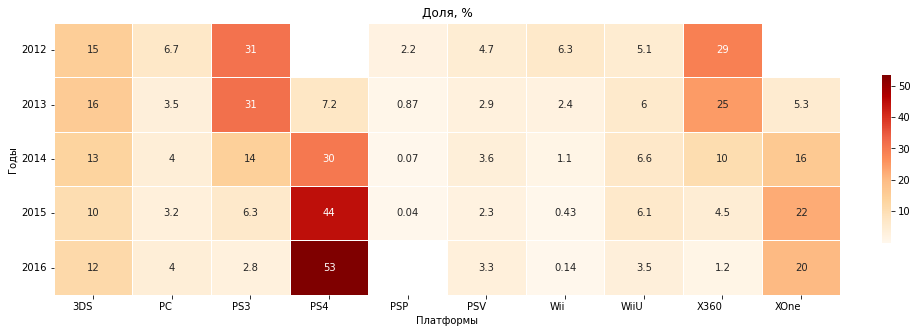

In [34]:
heatmap_data=df_predict.reset_index().pivot('year_of_release', 'platform', 'ratio')

plt.figure(figsize=(15,5))
g = sns.heatmap(
    heatmap_data, 
    cbar_kws={'fraction' : 0.01}, 
    cmap='OrRd', 
    linewidth=1,
    annot=True
)
g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.set_title('Доля, %')
plt.xlabel('Платформы')
plt.ylabel('Годы')
plt.show()


На хитмепе очень хорошо видно как происходит смена поколений: PS3 угасает, PS4 набирает популярность, тоже самое просходит с парами: Wii - WiiU, X360 - XOne, PSP - PSV, а PC стабильно занимает свои 3-7%. 

Постром график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [36]:
#для наглядности также сгруппируем по платформам и посчитаем медианы
df_12_16[['platform', 'total_sales']].groupby('platform').median().sort_values(by='total_sales', ascending=False).T

platform,X360,WiiU,XOne,PS4,PS3,Wii,3DS,PC,PSV,PSP
total_sales,0.31,0.22,0.22,0.2,0.2,0.18,0.11,0.08,0.05,0.03


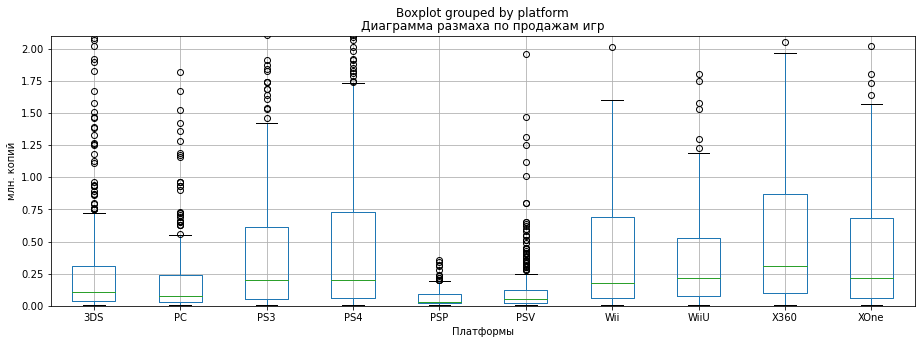

In [37]:
#посмотроим диаграмму размаха по глобальным продажам игр в разбивке по платформам
plot = df_12_16.boxplot(
       column = 'total_sales', 
       by = 'platform', 
       figsize=(15,5)
)
plt.gca().set_title('Диаграмма размаха по продажам игр')
plt.xlabel('Платформы')
plt.ylabel('млн. копий')
plt.ylim(0,2.1)
plt.show()

За 5 лет медианные значения по объему проданных игр у предыдущих поколений чуть больше, чем у новых. Оно и понятно, ведь старые поколения дольше на рынке. Лидеры по медианному значению - X360,	WiiU,	XOne,	PS4,	PS3 .

По диаграмме размаха видно, что фактически, для платформ - лидеров максимальные значения находятся в диапазоне от 1 до 2х млн. копий. Все что больше этих значений являются выбросами. Для остальных же платформ этот диапазон равен 0.2  - 1.5 млн.копий.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 


In [38]:
#создадим спикок перспективных платформ, те что в 2015 и 2016 году занимали больше 10% от общей доли продаж
platform_list = df_predict.reset_index() \
                          .query('(year_of_release == 2015 or year_of_release == 2016) and ratio>10')['platform'] \
                          .unique()
platform_list

array(['3DS', 'PS4', 'XOne'], dtype=object)

In [39]:
#посчитаем корреляцию для этих трех платформ
for i in platform_list:
    display(df_12_16.query('platform == @i') \
                    .groupby('platform')[['total_sales','user_score', 'critic_score']] \
                    .corr().round(2))

total_sales  user_score  critic_score
platform                                                    
3DS      total_sales          1.00        0.20          0.32
         user_score           0.20        1.00          0.72
         critic_score         0.32        0.72          1.00

total_sales  user_score  critic_score
platform                                                    
PS4      total_sales          1.00       -0.03          0.41
         user_score          -0.03        1.00          0.56
         critic_score         0.41        0.56          1.00

total_sales  user_score  critic_score
platform                                                    
XOne     total_sales          1.00       -0.07          0.42
         user_score          -0.07        1.00          0.47
         critic_score         0.42        0.47          1.00

В целом, зависимость не очень большая. Максимальная зависимость есть между оценками критиков и продажами, особенно для платформы XOne показатель равен 0.42. От оценок пользователей продажи не зависят, есть даже небольшая обратная зависимость для XOne и PS4. Посмотрим диаграмму рассеяния.

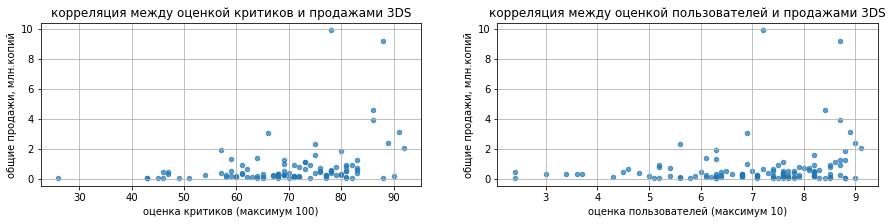

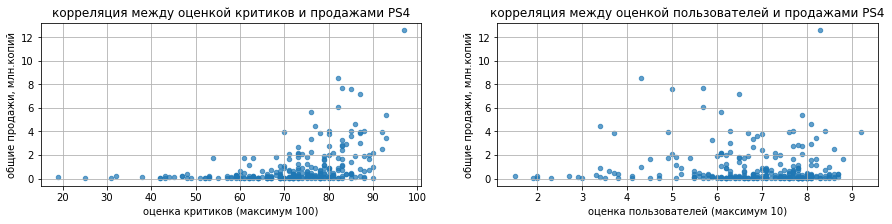

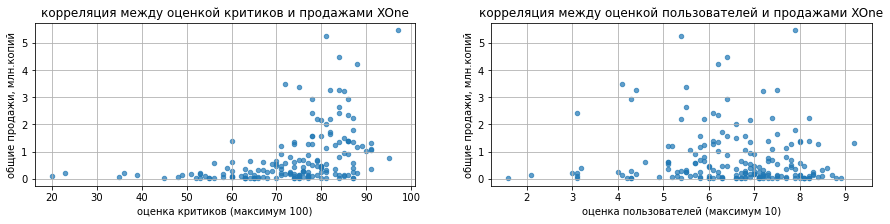

In [40]:
#построим диаграмму рассеяния зависимости между отзывами и продажами
for i in platform_list:
    fig, axes = plt.subplots(1,2, figsize=(15,3))
    #оценка критиков
    df_12_16[['platform','total_sales','critic_score']].query('platform == @i') \
                                                       .plot(x = 'critic_score', \
                                                             y = 'total_sales', \
                                                             kind='scatter', \
                                                             grid=True, \
                                                             alpha = 0.7, \
                                                             ax=axes[0])
    axes[0].set_title('корреляция между оценкой критиков и продажами '+i)
    axes[0].set_ylabel('общие продажи, млн.копий')
    axes[0].set_xlabel('оценка критиков (максимум 100)')    
    
    #оценка пользователей
    df_12_16[['platform','total_sales','user_score']].query('platform == @i') \
                                                     .plot(x = 'user_score', \
                                                           y = 'total_sales', \
                                                           kind='scatter', \
                                                           grid=True, \
                                                           alpha = 0.7, \
                                                           ax=axes[1])    
    axes[1].set_title('корреляция между оценкой пользователей и продажами '+i)
    axes[1].set_ylabel('общие продажи, млн.копий')
    axes[1].set_xlabel('оценка пользователей (максимум 10)')

plt.show()

Диаграмма рассеяния подтверждает это. Продажи больше зависят от оценки критиков, чем оценок покупателей.

Посмотрим на общее распределение игр по жанрам.

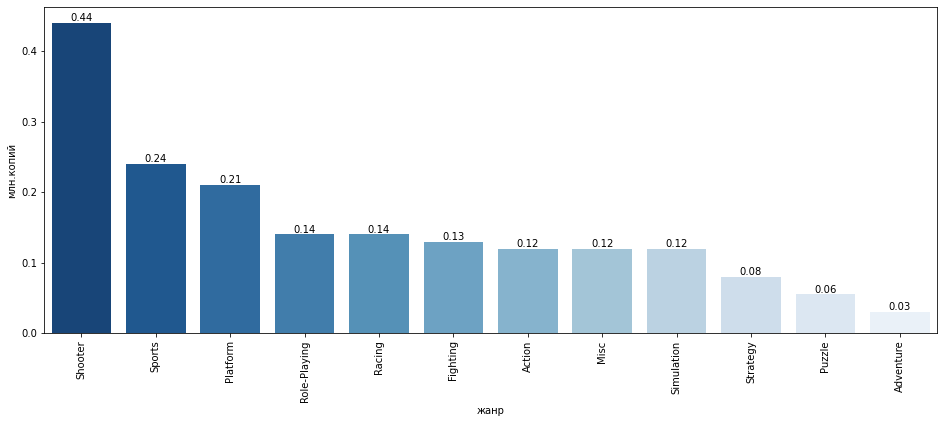

In [41]:
#соберем данные в сводную таблицу по жанру, где значенями будут медианные общие продажи, по убыванию
df_genre = df_12_16.pivot_table(index='genre', values='total_sales', aggfunc='median') \
                   .sort_values(by='total_sales', ascending=False)

#построим столбчатую диаграмму 
df_genre.plot(y='total_sales', 
              kind='bar', 
              figsize=(16, 6),
              legend=None)

sns.barplot(x=df_genre.index, y=df_genre['total_sales'], palette = "Blues_r")
plt.ylabel('млн.копий')
plt.xlabel('жанр')

#покажем значение над каждым баром
for x, y in enumerate (df_genre['total_sales']):
    plt.text(x, y, str(round(y, 2)), ha = 'center', va='bottom')

plt.show()

- Action - Имеет акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами,
- Adventure - Делает упор на головоломки без высокой активности,
- Fighting - Основное внимание уделяется бою один на один,
- Misc - Игры не вошедшие в классификацию (другие),
- Platform - Основное внимание уделяется прыжкам или сложностям навигации, часто включают в себя элементы игр-экшенов,
- Puzzle - Сосредоточена на решение абстрактных головоломок,
- Racing - Соревнованиями по времени между персонажами или транспортными средствами,
- Role-playing (RPG) - Сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа,
- Shooter - Стрелялка, англ. shooter — «стрелок»,
- Simulation - Имитация реальных процессов, часто без указания цели,
- Sports - Отражают соревнования по существующим видам спорта,
- Strategy -  Стратегия, игра акцентом на тактические управление ресурсами и территорией против оппонента

Медианные значения по объему продаж в расчете на единицу игры больше всего в жанрах Shooter - 0.44, Sport - 0.24 и Platform - 0.21, меньше всего в жанре Adventure - 0.03 и Puzzle - 0.06.

### Вывод
<a id='3.1'></a>

- График с количеством выпущенных игр по годам показал, что больше всего игр выпускалось в 2008 и 2009 годах - 1427 и 1426 соответственно, меньше всего в 1980 - 9.
- График общего объема продаж показывает, что резкий скачок произошел в 1996 году, более чем в 2 раза и дальше продажи росли до 2008 года. Дальше начался спад, вплоть до 2016 года. Так как данные за 2016 год могут быть неполными, то выводы можем делать об общей динамике до 2015 года. За 7 полных лет (с 2008-го по 2015 год) объемы продаж уменьшились в 2,5 раза. 
- Характерный срок появления новых и исчезновения старых платформ равен 7 годам. За это время поколения платформ сменяют друг друга. PS3 сменилось на PS4, Wii на WiiU, X360 на XOne, PSP на PSV, а PC занимает от 3 до 7%. 
- **Актуальный период для анализа определили как 2012 - 2016**
- Выявили, что лидерами продаж за 2015 и 2016 года стали: '3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'. 
- График «ящик с усами» по глобальным продажам игр в разбивке по платформам показал, что за 5 лет медианные значения по объему проданных копий у предыдущих поколений платформ чуть больше, чем у новых. Оно и понятно, ведь старые поколения дольше на рынке. Лидеры по медианному значению: X360 - 0.31 , XOne - 0.22, WiiU - 0.22, PS3/PS4 - 0.20. Меньше всего значение для платформ PSP - 0.03, PSV - 0.05, PC - 0.08.
- Коэффициент корреляции и диаграмма рассеяния показала, что максимальная зависимость есть между оценками критиков и продажами, особенно для платформы XOne показатель равен 0.42. От оценок пользователей продажи не зависят, есть даже небольшая обратная зависимость для XOne и PS4.
- Медианные значения по объему продаж в расчете на единицу игры больше всего в жанрах Shooter - 0.44, Sport - 0.24 и Platform - 0.21, меньше всего в жанре Adventure - 0.03 и Puzzle - 0.06.

## Шаг 4  Портрет пользователя каждого региона
<a id='4'></a>

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Выявим разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)

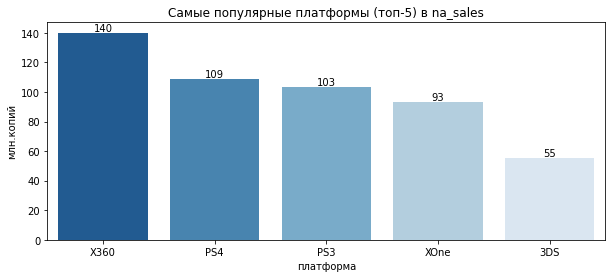

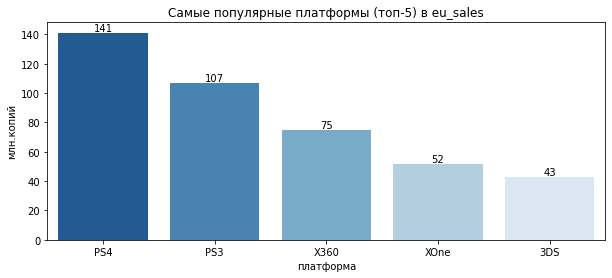

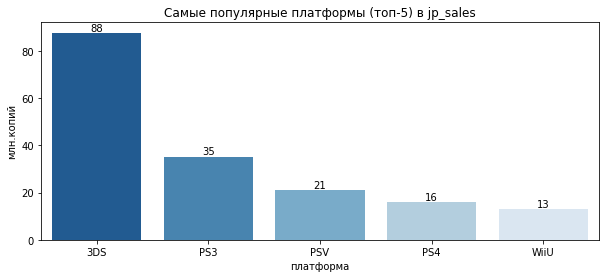

In [42]:
#самые популярные платформы (топ-5) для каждого региона
list_of_country = ['na_sales','eu_sales','jp_sales']

#создадим цикл, который будет сначала собирать данные в сводную таблицу по платформе, 
#где значенями будут просуммированные общие продажи, по убыванию
for country in list_of_country:
    df_top_platform = df_12_16.pivot_table(index='platform', values=country, aggfunc='sum') \
                              .sort_values(by=country, ascending=False) \
                              .head()
    
#далее, построит столбчатую диаграмму 
    df_top_platform.plot(y=country, kind='bar', figsize=(10, 4),
                         title = 'Самые популярные платформы (топ-5) в '+ country,
                         legend=False)              

    sns.barplot(x=df_top_platform.index, y=df_top_platform[country], palette = "Blues_r")
    plt.ylabel('млн.копий')
    plt.xlabel('платформа')
    plt.xticks(rotation=0)

#покажет значение над каждым баром
    for x, y in enumerate (df_top_platform[country]):
        plt.text(x, y, str(round(y)), ha = 'center', va='bottom')
    plt.show()

**Топ-5 cамые популярные платформы** распределились так: 
- `PS4`, `PS3`, `3DS` - вошли в топ все трех регионов;
- `X360`, `XOne` - вошли в топы Серверной Америки и Европы;
- `WiiU`, `PSV` - только Япония. 

Похоже, что японцы больше любят портативные консоли и родной рынок. Игры на иксбоксы там продвигать точно не стоит 

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные жанры (топ-5)

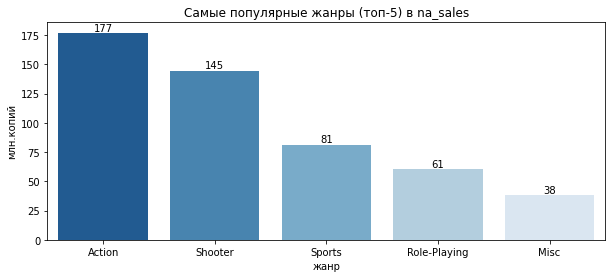

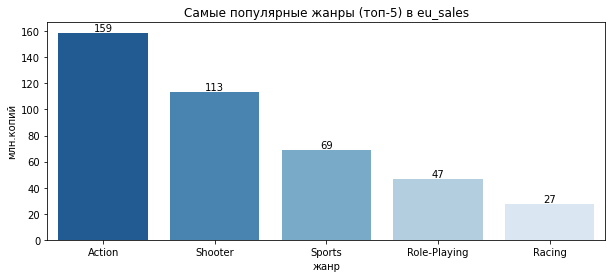

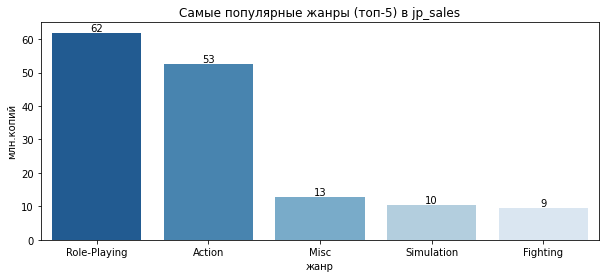

In [43]:
#Самые популярные жанры (топ-5) для каждого региона
list_of_country = ['na_sales','eu_sales','jp_sales']

#создадим цикл, который будет сначала собирать данные в сводную таблицу по жанру, 
#где значенями будут просуммированные общие продажи, по убыванию
for country in list_of_country:
    df_top_genre = df_12_16.pivot_table(index='genre', values=country, aggfunc='sum') \
                           .sort_values(by=country, ascending=False) \
                           .head()
    
#далее построит столбчатую диаграмму 
    df_top_genre.plot(y=country, kind='bar', figsize=(10, 4),
                      title = 'Самые популярные жанры (топ-5) в '+ country,
                      legend=False) 

    sns.barplot(x=df_top_genre.index, y=df_top_genre[country], palette = "Blues_r")
    plt.ylabel('млн.копий')
    plt.xlabel('жанр')
    plt.xticks(rotation=0)
    
#покажет значение над каждым баром
    for x, y in enumerate (df_top_genre[country]):
        plt.text(x, y, str(round(y)), ha = 'center', va='bottom')
    plt.show()    

**Топ-5 cамые популярные жанры**:
- `Action`, `Role-Playing` - для всех трех регионов;
- `Sports`,`Shooter` - вошли в топы Серверной Америки и Европы;
- `Racing` - только Европа;
- `Misc` - Северная Америка, Япония;
- `Simulating`, `Figting` - только Япония.

Определим для пользователя каждого региона (NA, EU, JP):
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Расшифровка рейтингов ESRB:**

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» ( до 1994 года "K-A" ("Kids to Adults"))
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

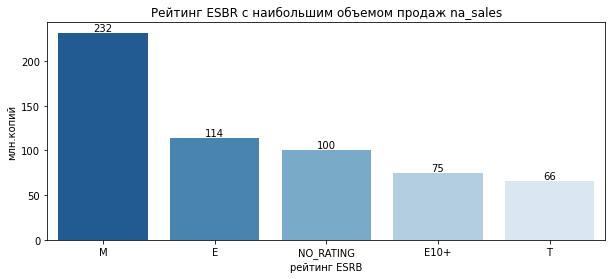

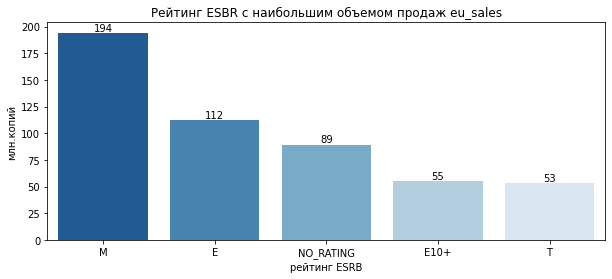

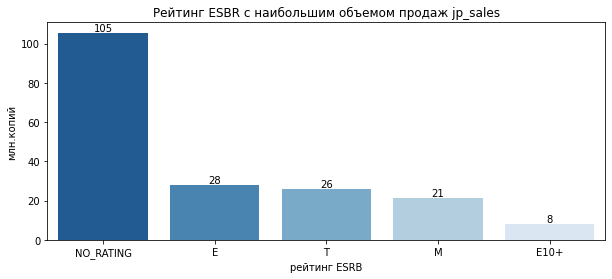

In [44]:
#посмотрим как распределяются продажи по рейтингам
list_of_country = ['na_sales','eu_sales','jp_sales']
for country in list_of_country:
    df_esrb = df_12_16.pivot_table(index='rating', values=country, aggfunc='sum') \
                 .sort_values(by=country, ascending=False)

#построим столбчатую диаграмму 
    df_esrb.plot(y=country, kind='bar', figsize=(10, 4),
            title = 'Рейтинг ESBR с наибольшим объемом продаж '+ country,
            legend=False)             

    sns.barplot(x=df_esrb.index, y=df_esrb[country], palette = "Blues_r")
    plt.ylabel('млн.копий')
    plt.xlabel('рейтинг ESRB')
    plt.xticks(rotation=0)
    
#покажем значение над каждым баром
    for x, y in enumerate (df_esrb[country]):
        plt.text(x, y, str(round(y)), ha = 'center', va='bottom')
    plt.show()    

В Северной Америке и Европе наиболее продаваемы игры с рейтингом  «M» («Mature») — «Для взрослых», а в Японии же NO_RATING — без определенного значения рейтинга.

В Северной Америке и Европе наименее продаваемы игры с рейтингом «T» («Teen») — «Подросткам», а в Японии - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

Япония снова отличилась. Скорее всего, дело тут в том, что ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на Западе и на Востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.


### Вывод
<a id='4.1'></a>

Мы исследовали показатели за период с 2014 по 2016 года.

**Топ-5 cамые популярные платформы** распределились так: 
- `PS4`, `PS3`, `3DS` - вошли в топ все трех регионов;
- `X360`, `XOne` - вошли в топы Серверной Америки и Европы;
- `WiiU`, `PSV` - только Япония. 

**Топ-5 cамые популярные жанры**:
- `Action`, `Role-Playing` - для всех трех регионов;
- `Sports`,`Shooter` - вошли в топы Серверной Америки и Европы;
- `Racing` - только Европа;
- `Misc` - Северная Америка, Япония;
- `Simulating`, `Figting` - только Япония.

**Влияние рейтинга ESRB на продажи** в отдельном регионе:

В Северной Америке и Европе наиболее продаваемы игры с рейтингом  «M» («Mature») — «Для взрослых», а в Японии же NO_RATING — без определенного значения рейтинга.

В Северной Америке и Европе наименее продаваемы игры с рейтингом «T» («Teen») — «Подросткам», а в Японии - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

## Шаг 5  Проверка гипотезы
<a id='5'></a>

В данном разделе нам необходимо проверить две исследовательские гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Зададим самостоятельно пороговое значение alpha равное .01

###  Гипотеза 1:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Так как в задании не уточняется в какую сторону (больше или меньше), то будем формулировать двустороннюю гипотезу. 

Получается: 
- H0: cредние пользовательские рейтинги платформ Xbox One и PC равны; 
- H1: cредние пользовательские рейтинги платформ Xbox One и PC различаются.

In [45]:
#зададим переменные для cредних пользовательских рейтингов платформ Xbox One и PC
user_score_XOne = df_12_16.loc[ (df ['platform'] == 'XOne') & ~(df_12_16['user_score'].isna())]['user_score']
user_score_PC = df_12_16.loc[(df ['platform'] == 'PC') & ~(df_12_16['user_score'].isna())]['user_score']

round(user_score_PC.mean(), 2), round (user_score_XOne.mean(), 2)

(6.44, 6.52)

In [46]:
#зададим критический уровень статистической значимости
alpha = .01

#проверим гипотезу о равенстве средних двух независимых совокупностей
results_for_test_1 = st.ttest_ind(
    user_score_XOne, 
    user_score_PC,
    equal_var=False) #Так как размеры выборки отличаются, то мы установили 
#параметр equal_var==False, чтобы тест посчитал дисперсии выборок по отдельности

print('p-значение: ', results_for_test_1.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости:
if results_for_test_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5926157183101111
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 59%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между cредними пользовательскими рейтингами платформ Xbox One и PC.

###  Гипотеза 2:

Средние пользовательские рейтинги жанров Action и Sports разные.

Нам необходимо сравнить две генеральные совокупности. Гипотеза также двухсторонняя, так как не уточняется в какую сторону (больше или меньше) различие.

Формулируем гипотезу:
- H0: cредние пользовательские рейтинги жанров Action и Sports равны;
- H1: cредние пользовательские рейтинги жанров Action и Sports различаются.

In [47]:
#зададим переменные для cредниx пользовательских рейтингов жанров Action и Sports
user_score_Action = df_12_16.loc[ (df_12_16 ['genre'] == 'Action') & ~(df_12_16['user_score'].isna())]['user_score']
user_score_Sports = df_12_16.loc[ (df_12_16 ['genre'] == 'Sports') & ~(df_12_16['user_score'].isna())]['user_score']

round(user_score_Action.mean(), 2), round(user_score_Sports.mean(), 2)

(6.83, 5.46)

In [48]:
#зададим критический уровень статистической значимости
alpha = .01

#проверим гипотезу о равенстве средних двух независимых совокупностей
results_for_test_1 = st.ttest_ind(
    user_score_Action, 
    user_score_Sports,
    equal_var=False) #Так как размеры выборки отличаются, то мы установили 
                     #параметр equal_var==False, чтобы тест посчитал дисперсии выборок по отдельности

print('p-значение: ', results_for_test_1.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости:
if results_for_test_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.2854932137857065e-20
Отвергаем нулевую гипотезу


Полученное значение p-value меньше уровня критического уровня значимости равного .01. Отвергаем нулевую гипотезу.
Соответственно, у нас не получается отвергнуть исследовательскую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод
<a id='5.1'></a>

В данном разделе мы проверили две исследовательские гипотезы:

Гипотеза 1
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Перформулировав исследовательскую гипотезу в двухстороннюю статистическую гипотезу о равенстве двух генеральных совокупностей с критическим уровнем значимости равным .01 не смоги опровергнуть нулевую гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC равны, вероятность получить такое значение равно 29%. 

Соответственно, мы не смогли опровергнуть исследовательскую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 2
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Перформулировав в двухстороннюю статистическую гипотезу о равенстве двух генеральных совокупностей с критическим уровнем значимости равным .01 не смоги опровергнуть нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports равны, вероятность получить такое значение равно 4%. При менее строгом критическом значении статистической значимости — .05 мы получили бы другой результат, так как p-value меньше 5%.

Соответственно, мы отвергаем исследовательскую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Шаг 6 Общий вывод
<a id='6'></a>

Мы провели аналитику для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Для анализа мы использовали данные из открытых источников с доступными историческими данными о продажах игр в Северной Америке, Европе и Японии, оценки пользователей и экспертов, жанры и платформы с 1980 го по 2016 год. 

Нашей целью было выявление закономерностей, определяющих успешность игры, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год.

**Исследовательский анализ данных**

- График с количеством выпущенных игр по годам показал, что больше всего игр выпускалось в 2008 и 2009 годах - 1427 и 1426 соответственно, меньше всего в 1980 - 9.
- График общего объема продаж показывает, что резкий скачок произошел в 1996 году, более чем в 2 раза и дальше продажи росли до 2008 года. Дальше начался спад, вплоть до 2016 года. Так как данные за 2016 год могут быть неполными, то выводы можем делать об общей динамике до 2015 года. За 7 полных лет (с 2008-го по 2015 год) объемы продаж уменьшились в 2,5 раза. Характерный срок появления новых и исчезновения старых платформ равен 7 годам. За это время поколения платформ сменяют друг друга. PS3 сменилось на PS4, Wii на WiiU, X360 на XOne, PSP на PSV, а PC занимает от 3 до 7%. 
- Актуальный период для анализа определили как 2012 - 2016.
- Выявили, что лидерами продаж за 2015 и 2016 года стали: '3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'. 
- График «ящик с усами» по глобальным продажам игр в разбивке по платформам показал, что за 7 лет медианные значения по объему проданных копий у предыдущих поколений платформ чуть больше, чем у новых. Оно и понятно, ведь старые поколения дольше на рынке. Лидеры по медианному значению: X360 - 0.31 , XOne - 0.22, WiiU - 0.22, PS3/PS4 - 0.20. Меньше всего значение для платформ PSP - 0.03, PSV - 0.05, PC - 0.08.
- Коэффициент корреляции и диаграмма рассеяния показала, что максимальная зависимость есть между оценками критиков и продажами, особенно для платформы XOne показатель равен 0.42. От оценок пользователей продажи не зависят, есть даже небольшая обратная зависимость для XOne и PS4.
- Медианные значения по объему продаж в расчете на единицу игры больше всего в жанрах Shooter - 0.44, Sport - 0.24 и Platform - 0.21, меньше всего в жанре Adventure - 0.03 и Puzzle - 0.06.


**Портрет пользователя каждого региона**

Мы исследовали показатели за период с 2012 по 2016 года. Пользователи Европы и Северной Америки максимально похожи во вкусах, Япония имеет больше разлийчий.

**Топ-5 cамые популярные платформы** распределились так: 
- `PS4`, `PS3`, `3DS` - вошли в топ все трех регионов;
- `X360`, `XOne` - вошли в топы Серверной Америки и Европы;
- `WiiU`, `PSV` - только Япония. 

**Топ-5 cамые популярные жанры**:
- `Action`, `Role-Playing` - для всех трех регионов;
- `Sports`,`Shooter` - вошли в топы Серверной Америки и Европы;
- `Racing` - только Европа;
- `Misc` - Северная Америка, Япония;
- `Simulating`, `Figting` - только Япония.

**Влияние рейтинга ESRB на продажи** в отдельном регионе:

В Северной Америке и Европе наиболее продаваемы игры с рейтингом  «M» («Mature») — «Для взрослых», а в Японии же NO_RATING — без определенного значения рейтинга.

В Северной Америке и Европе наименее продаваемы игры с рейтингом «T» («Teen») — «Подросткам», а в Японии - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». 


**Проверка гипотез**

Мы проверили две исследовательские гипотезы:

**Гипотеза 1**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Перформулировав исследовательскую гипотезу в двухстороннюю статистическую гипотезу о равенстве двух генеральных совокупностей с критическим уровнем значимости равным .01 не смогли опровергнуть нулевую гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC равны, вероятность получить такое значение равно 59%. 

Соответственно, мы не смогли отвергнуть исследовательскую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза 2**
- Средние пользовательские рейтинги жанров Action и Sports разные. 

Перформулировав в двухстороннюю статистическую гипотезу о равенстве двух генеральных совокупностей с критическим уровнем значимости равным .01 мы получили значение p-value меньше уровня критического уровня значимости и отвергли нулевую гипотезу.

Соответственно, мы не смогли отвергнуть исследовательскую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports разные.

## Чек-лист готовности проекта
<a id='7'></a>


- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  заполнены пропущенные значения
- [x]  изменены типы данных
- [x]  данные приведены к нужным типам
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  найдены и исправлены ошибки в данных
- [x]  проведен исследовательский анализ данных
- [x]  составлен портрет пользователя каждого региона
- [x]  проверены гипотезы
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод